In [67]:
import numpy as np
from mnist import MNIST  # require `pip install python-mnist`
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [68]:
from display_network import *

# Load the MNIST dataset
mnist_data = MNIST("../sources/MNIST/")
mnist_data.load_testing()
test_images = mnist_data.test_images
normalized_images = np.array(test_images)[:1000, :] / 256.0  # Normalize pixel values
images_subset = normalized_images


In [69]:
# Number of clusters for k-means
num_clusters = 10
kmeans_model = KMeans(n_clusters=num_clusters).fit(images_subset)

In [70]:
# Predict cluster labels for the dataset
predicted_labels = kmeans_model.predict(images_subset)

In [71]:
# Debugging information
print(images_subset.shape)  # Shape of the normalized images
print(predicted_labels)  # Predicted cluster labels

(1000, 784)
[9 2 1 4 6 1 9 6 3 3 8 7 9 8 1 5 6 9 5 6 3 4 7 4 6 8 6 6 8 1 2 1 5 7 3 0 9
 1 2 1 1 9 9 1 2 2 2 0 6 6 4 5 4 5 7 4 6 1 6 1 6 3 9 0 3 2 7 6 5 8 9 8 0 3
 1 9 2 9 3 3 6 4 0 6 3 6 9 5 7 1 5 4 3 2 2 6 2 1 4 6 7 8 5 6 6 6 0 1 6 9 2
 1 2 6 9 9 9 6 9 3 5 4 9 4 9 6 8 3 3 3 4 4 5 9 3 1 4 1 7 3 4 6 5 1 3 1 3 0
 4 1 6 6 3 5 1 3 7 4 5 1 9 4 5 6 7 5 9 1 1 6 6 3 0 5 0 1 1 3 1 5 1 5 3 8 2
 9 0 5 8 2 1 2 8 6 8 2 1 4 9 0 5 7 1 1 1 2 9 5 0 6 6 3 6 1 6 4 2 3 3 2 6 0
 0 9 1 0 3 9 1 9 2 2 5 3 9 6 0 0 6 1 5 5 3 9 1 2 8 0 6 0 6 1 6 2 9 9 0 2 0
 7 3 1 9 9 2 1 4 1 5 8 5 8 1 9 6 6 1 3 0 1 0 3 9 3 6 0 4 7 1 5 6 0 6 0 8 6
 8 8 0 2 1 9 1 9 9 8 0 9 9 2 5 8 4 5 1 6 2 3 5 5 1 3 6 2 4 3 1 8 9 1 1 0 1
 5 2 2 6 9 5 4 2 6 1 5 5 1 4 3 1 9 2 5 8 7 1 3 5 1 6 9 7 7 9 1 5 4 7 5 4 2
 9 2 8 3 3 3 9 1 1 6 8 9 5 9 7 1 4 0 1 9 7 3 4 1 9 5 0 5 6 6 0 2 5 3 0 6 5
 8 5 1 6 1 5 9 6 9 1 9 0 1 3 0 6 0 8 6 9 1 3 3 1 3 6 3 9 3 3 5 9 4 8 4 5 2
 3 8 4 3 3 5 5 5 0 5 6 1 1 4 3 8 9 7 7 7 3 3 3 0 3 5 3 9 7 1 3 7 1 0 2 5 1
 6 6 1 6 8 3 

In [72]:
# Debugging information for k-means cluster centers
print(type(kmeans_model.cluster_centers_.T))
print(kmeans_model.cluster_centers_.T.shape)

<class 'numpy.ndarray'>
(784, 10)


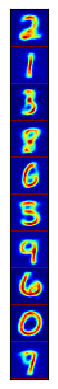

In [73]:
# Display the k-means cluster centers
cluster_centers_image = display_network(kmeans_model.cluster_centers_.T, num_clusters, 1)
f1 = plt.imshow(cluster_centers_image, interpolation='nearest', cmap='jet')
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')  # Save the image if needed

# Create a colormap and normalize the cluster center image simple
color_map = plt.cm.jet
normalizer = plt.Normalize(vmin=cluster_centers_image.min(), vmax=cluster_centers_image.max())

In [74]:
# Convert the normalized simple to colors (RGBA)
rgba_image = color_map(normalizer(cluster_centers_image))

# Save the RGBA image
import imageio
imageio.imwrite('aa.png', (rgba_image * 255).astype('uint8'))

# Debugging information for cluster labels
print(type(predicted_labels))
print(predicted_labels.shape)
print(type(normalized_images))

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>


In [75]:
# Number of nearest neighbors to select per cluster
samples_per_cluster = 20
nearest_neighbors_images = np.zeros((samples_per_cluster * num_clusters, 784))
first_samples_images = np.zeros((samples_per_cluster * num_clusters, 784))

# Process each cluster
for cluster_idx in range(num_clusters):
    # Extract samples belonging to the current cluster
    cluster_samples = normalized_images[predicted_labels == cluster_idx, :]

    # Find the nearest neighbors to the cluster center
    cluster_center = [kmeans_model.cluster_centers_[cluster_idx]]
    nearest_neighbors_model = NearestNeighbors().fit(cluster_samples)
    distances, neighbor_indices = nearest_neighbors_model.kneighbors(
        cluster_center, n_neighbors=samples_per_cluster
    )

    # Flatten neighbor indices for indexing
    neighbor_indices = neighbor_indices.flatten()

    # Store nearest neighbors in the nearest_neighbors_images array
    nearest_neighbors_images[
    samples_per_cluster * cluster_idx: samples_per_cluster * (cluster_idx + 1), :
    ] = cluster_samples[neighbor_indices, :]

    # Store the first samples from the cluster in the first_samples_images array
    first_samples_images[
    samples_per_cluster * cluster_idx: samples_per_cluster * (cluster_idx + 1), :
    ] = cluster_samples[:samples_per_cluster, :]

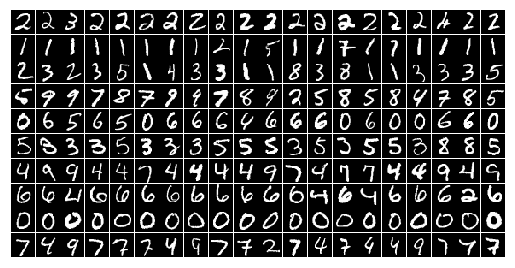

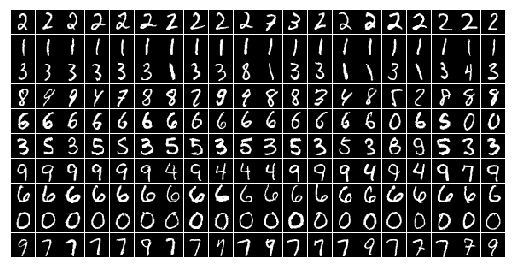

In [76]:
# Display the first samples for each cluster
plt.axis('off')
first_samples_image_display = display_network(first_samples_images.T, num_clusters, samples_per_cluster)
f2 = plt.imshow(first_samples_image_display, interpolation='nearest')
plt.gray()
plt.show()

# Display the nearest neighbors for each cluster
plt.axis('off')
nearest_neighbors_image_display = display_network(nearest_neighbors_images.T, num_clusters, samples_per_cluster)
f2 = plt.imshow(nearest_neighbors_image_display, interpolation='nearest')
plt.gray()

# plt.show()  # Uncomment to display the image
